## What is loan?

In finance, a loan is the transfer of money by one party to another with an agreement to pay it back. The recipient, or borrower, incurs a debt and is usually required to pay interest for the use of the money.

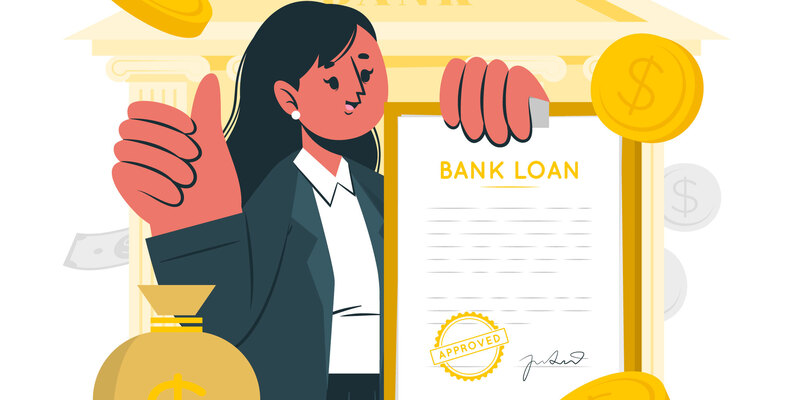

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## About Dataset
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

## About columns:
- `loan_id`
- `no_of_dependents`: Number of Dependents of the Applicant
- `education`: Education of the Applicant (Graduate/Not Graduate)
- `self_employed`: Employment Status of the Applicant
- `income_annum`: Annual Income of the Applicant
- `loan_amount`: Loan Amount
- `loan_term`: Loan Term in Years
- `cibil_score`: Credit Score
- `residential_assets_value`
- `commercial_assets_value`
- `luxury_assets_value`
- `bank_asset_value`
- `loan_status`: Loan Approval Status (Approved/Rejected)

In [2]:
#read the data
loan_data = pd.read_csv("loan_approval_dataset.csv")
loan_data.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

## Data Exploration

In [3]:
# Display information about the DataFrame including data types and non-null counts
loan_data.info()

# Count the number of duplicate rows in the DataFrame
duplicate_count = loan_data.duplicated().sum()

# Print the number of duplicates
print("Number of duplicates in loan_data:", duplicate_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
Number of dupli

In [4]:
list(loan_data)

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

The data consists of 4269 loans, each with 13 attributes for every loan applicant.

- There are no null values in the dataset.
- The data type for each column is accurately parsed.
- The names of the features are consistent and descriptive but have a prefix space that should be removed.
- There are no duplicate loans in the dataset.
- no_of_dependents, education, self_employed and loan_status are categorical columns.
- Other columns are numerical.

We need some preprocessing, such as:
- removing the loan_id column, which is not important for our analysis.
- Convert the no_of_dependents to a categorical type because the values in it represent categories (number of dependents) rather than numerical values. The no_of_dependents column represents the number of dependents for each loan applicant. Since the number of dependents is a discrete and categorical variable (e.g., 0 dependents, 1 dependent, 2 dependents, etc.), it would be more appropriate to treat it as a categorical variable rather than a numerical one. This allows us to analyze and interpret the data based on distinct categories instead of treating it as a continuous numerical value.
- Remove the prefix space in each column name 

In [5]:
# Remove leading and trailing whitespaces from all column names
loan_data.rename(columns=lambda x: x.strip(), inplace=True)

# Drop the 'loan_id' column from the DataFrame
loan_data.drop('loan_id', inplace=True, axis=1)

# Convert the 'no_of_dependents' column to the 'object' data type
loan_data['no_of_dependents'] = loan_data['no_of_dependents'].astype('object')
loan_data

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                   2       Graduate            No       9600000     29900000   
1                   0   Not Graduate           Yes       4100000     12200000   
2                   3       Graduate            No       9100000     29700000   
3                   3       Graduate            No       8200000     30700000   
4                   5   Not Graduate           Yes       9800000     24200000   
...               ...            ...           ...           ...          ...   
4264                5       Graduate           Yes       1000000      2300000   
4265                0   Not Graduate           Yes       3300000     11300000   
4266                2   Not Graduate            No       6500000     23900000   
4267                1   Not Graduate            No       4100000     12800000   
4268                1       Graduate            No       9200000     29700000   

      loan_term  cibil_score  residential_assets_value  \
0            12          778                   2400000   
1             8          417                   2700000   
2            20          506                   7100000   
3             8          467                  18200000   
4            20          382                  12400000   
...         ...          ...                       ...   
4264         12          317                   2800000   
4265         20          559                   4200000   
4266         18          457                   1200000   
4267          8          780                   8200000   
4268         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  
0       Approved  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
...          ...  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved  

[4269 rows x 12 columns]

## Summary statistics

In [6]:
# Generate a summary of descriptive statistics for all columns in the loan_data
summary_stats = loan_data.describe(include="all").round(2)

no_of_dependents  education self_employed  income_annum  loan_amount  \
count             4269.0       4269          4269       4269.00      4269.00   
unique               6.0          2             2           NaN          NaN   
top                  4.0   Graduate           Yes           NaN          NaN   
freq               752.0       2144          2150           NaN          NaN   
mean                 NaN        NaN           NaN    5059123.92  15133450.46   
std                  NaN        NaN           NaN    2806839.83   9043362.98   
min                  NaN        NaN           NaN     200000.00    300000.00   
25%                  NaN        NaN           NaN    2700000.00   7700000.00   
50%                  NaN        NaN           NaN    5100000.00  14500000.00   
75%                  NaN        NaN           NaN    7500000.00  21500000.00   
max                  NaN        NaN           NaN    9900000.00  39500000.00   

        loan_term  cibil_score  residential_assets_value  \
count     4269.00      4269.00                   4269.00   
unique        NaN          NaN                       NaN   
top           NaN          NaN                       NaN   
freq          NaN          NaN                       NaN   
mean        10.90       599.94                7472616.54   
std          5.71       172.43                6503636.59   
min          2.00       300.00                -100000.00   
25%          6.00       453.00                2200000.00   
50%         10.00       600.00                5600000.00   
75%         16.00       748.00               11300000.00   
max         20.00       900.00               29100000.00   

        commercial_assets_value  luxury_assets_value  bank_asset_value  \
count                   4269.00              4269.00           4269.00   
unique                      NaN                  NaN               NaN   
top                         NaN                  NaN               NaN   
freq                        NaN                  NaN               NaN   
mean                 4973155.31          15126305.93        4976692.43   
std                  4388966.09           9103753.67        3250185.31   
min                        0.00            300000.00              0.00   
25%                  1300000.00           7500000.00        2300000.00   
50%                  3700000.00          14600000.00        4600000.00   
75%                  7600000.00          21700000.00        7100000.00   
max                 19400000.00          39200000.00       14700000.00   

       loan_status  
count         4269  
unique           2  
top       Approved  
freq          2656  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

1. `no_of_dependents`: The average number of dependents is approximately 2.499, indicating that, on average, applicants have around 2 to 3 dependents.
2. `education`: The majority of loan applicants (2,144 out of 4,269) have a graduate level of education.
3. `self_employed`: Out of the total applicants, 2,150 individuals are self-employed.
4. `income_annum`: The average annual income of loan applicants is approximately $5,059,123.92.
5. `loan_amount`: The average loan amount requested is approximately $15,133,450.00.
6. `loan_term`: The average loan term is 11 year.
7. `cibil_score`: The average CIBIL score is around 599.936.
8. `residential_assets_value`: The average value of residential assets owned by the applicants is approximately $7,472,617.
9. `commercial_assets_value`: The average value of commercial assets owned by the applicants is approximately $4,973,155.
10. `luxury_assets_value`: The average value of luxury assets owned by the applicants is approximately $15,126,305.
11. `bank_asset_value`: The average value of bank assets owned by the applicants is approximately $4,976,692.
12. `loan_status`: The majority of loan applications (2,656 out of 4,269) have been approved.

In [70]:
# Group the data by the 'loan_status'
grouped_data = loan_data.groupby('loan_status')

# Calculate descriptive statistics for each group
descriptive_stats = grouped_data.describe()

# Round the numerical values to two decimal places
rounded_stats = descriptive_stats.round(2)

# Pivot the level of the DataFrame, creating a multi-level index
stacked_stats = rounded_stats.stack()
stacked_stats

income_annum  loan_amount  loan_term  cibil_score  \
loan_status                                                            
 Approved   count       2656.00      2656.00    2656.00      2656.00   
            mean     5025903.61  15247251.51      10.40       703.46   
            std      2827228.24   9221695.94       5.88       125.25   
            min       200000.00    300000.00       2.00       300.00   
            25%      2600000.00   7500000.00       4.00       618.00   
            50%      5000000.00  14600000.00      10.00       711.00   
            75%      7500000.00  22100000.00      16.00       803.00   
            max      9900000.00  39500000.00      20.00       900.00   
 Rejected   count       1613.00      1613.00    1613.00      1613.00   
            mean     5113825.17  14946063.24      11.73       429.47   
            std      2772946.42   8741389.51       5.32        78.40   
            min       200000.00    300000.00       2.00       300.00   
            25%      2800000.00   7900000.00       8.00       364.00   
            50%      5100000.00  14500000.00      12.00       429.00   
            75%      7500000.00  20800000.00      16.00       493.00   
            max      9900000.00  38200000.00      20.00       885.00   

                   residential_assets_value  commercial_assets_value  \
loan_status                                                            
 Approved   count                   2656.00                  2656.00   
            mean                 7399811.75               5001355.42   
            std                  6501363.32               4390803.40   
            min                  -100000.00                     0.00   
            25%                  2100000.00               1400000.00   
            50%                  5400000.00               3700000.00   
            75%                 11200000.00               7800000.00   
            max                 29100000.00              19400000.00   
 Rejected   count                   1613.00                  1613.00   
            mean                 7592498.45               4926720.40   
            std                  6507619.09               4386905.17   
            min                  -100000.00                     0.00   
            25%                  2200000.00               1300000.00   
            50%                  5900000.00               3700000.00   
            75%                 11400000.00               7500000.00   
            max                 28700000.00              18800000.00   

                   luxury_assets_value  bank_asset_value  
loan_status                                               
 Approved   count              2656.00           2656.00  
            mean           15016603.92        4959525.60  
            std             9154285.79        3273717.69  
            min              300000.00              0.00  
            25%             7100000.00        2300000.00  
            50%            14400000.00        4500000.00  
            75%            21600000.00        7200000.00  
            max            38600000.00       14700000.00  
 Rejected   count              1613.00           1613.00  
            mean           15306943.58        5004959.70  
            std             9019849.98        3211871.23  
            min              300000.00              0.00  
            25%             8100000.00        2400000.00  
            50%            14800000.00        4600000.00  
            75%            21800000.00        7000000.00  
            max            39200000.00       14700000.00

We can see from the two distributions that there are no clear differences between the two classes.

## EDA

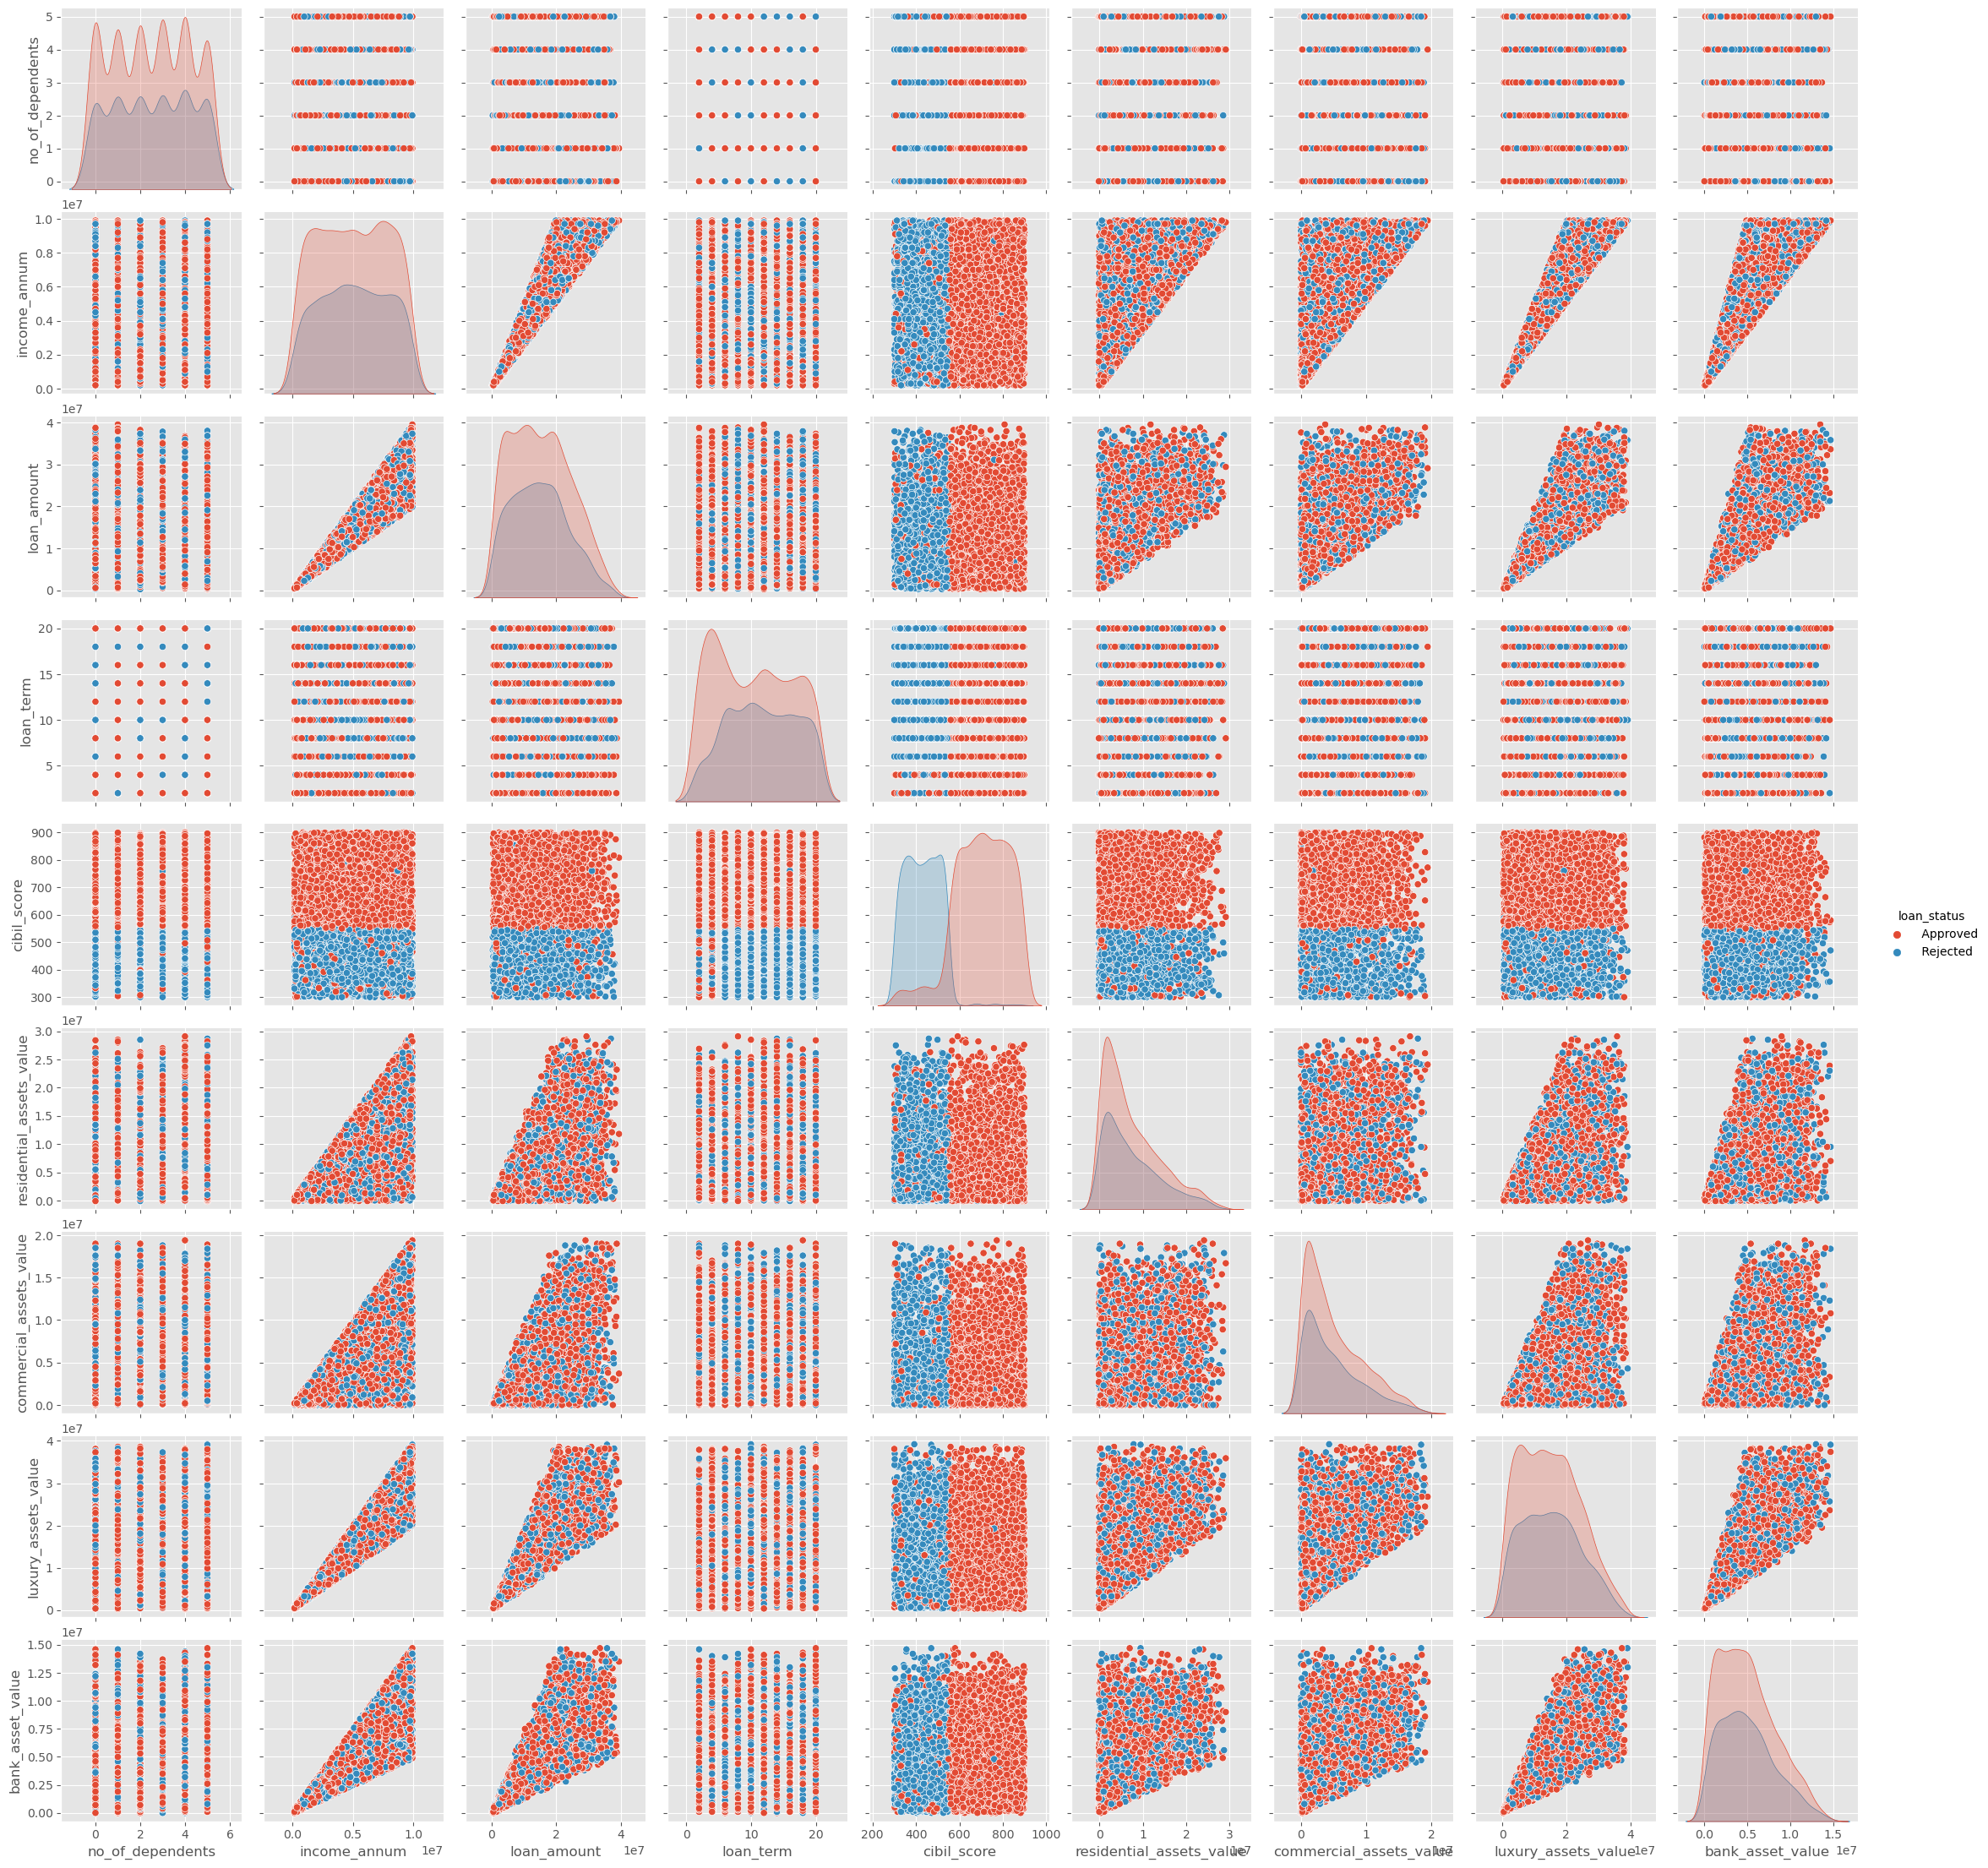

In [7]:
# Set the 'ggplot' style
plt.style.use('ggplot')

# Create a pairplot with hue as 'loan_status'
sns.pairplot(loan_data, hue='loan_status')

# Display the plot
plt.show()

From the chart, we can draw the following conclusions:

- Only the Cibil score emerges as a very strong predictor of the loan approval target, while all other features fail to provide distinctive information for distinguishing between approved or rejected classes.

- Additionally, a noticeable correlation exists among most features. This correlation could pose challenges when employing linear statistical models such as logistic regression, potentially leading to multicollinearity issues.

- To address this, it is advisable to examine both linear and non-linear correlations using methods like mutual information. However, it is crucial to preprocess the data correctly before undertaking this analysis.

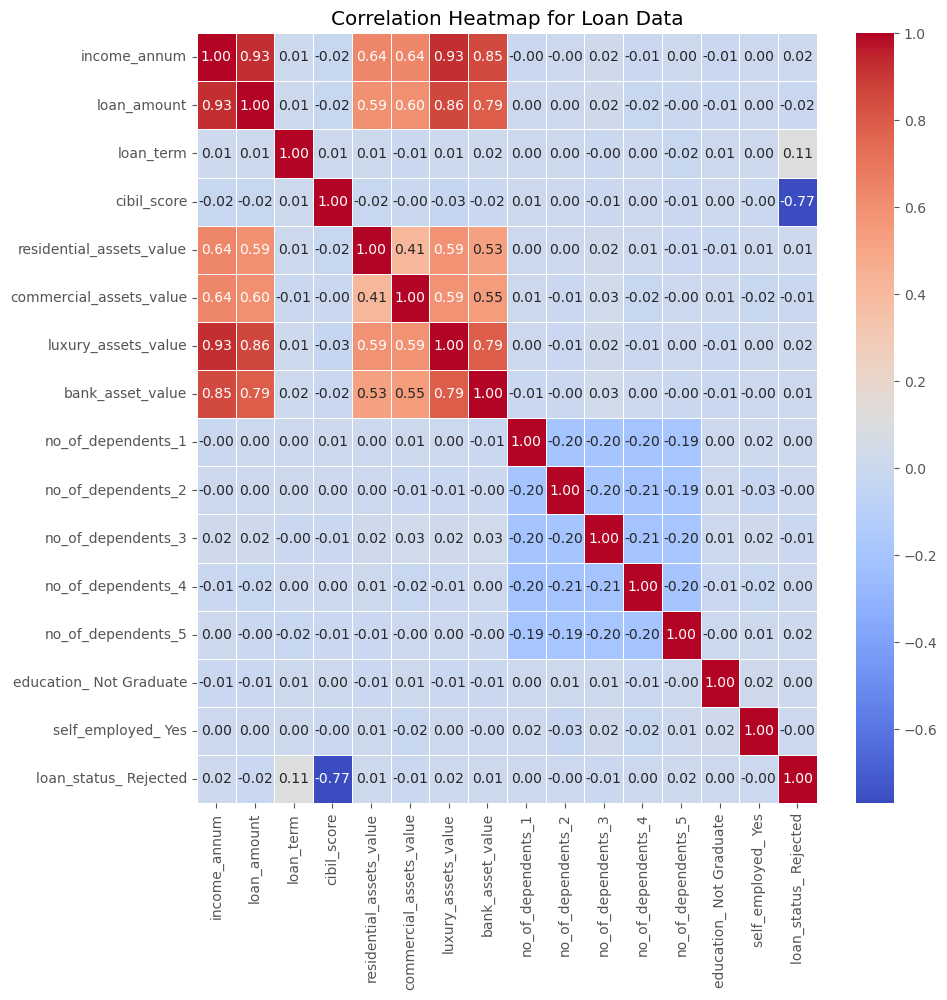

In [42]:
# One hot encoding (dummy variable):
loan_data_dummies = pd.get_dummies(loan_data, drop_first=True)

# Calculate correlation matrix
correlation_matrix = loan_data_dummies.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Loan Data')
plt.show()

<Axes: ylabel='Feature'>

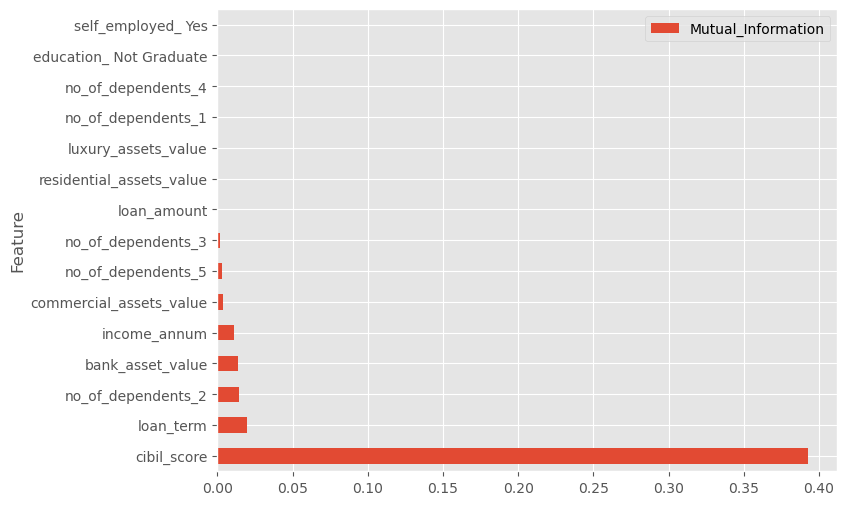

In [68]:
# Perform Mutual Information calculation
mutual_info = mutual_info_classif(loan_data_dummies.iloc[:,:-1], loan_data_dummies.iloc[:,-1], random_state=42)

# Create a DataFrame to store the results
mutual_info_df = pd.DataFrame({'Feature': loan_data_dummies.columns[:-1], 'Mutual_Information': mutual_info})

# Sort the DataFrame by Mutual Information values in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Information', ascending=False)

# Set 'Feature' column as the index
mutual_info_df.set_index('Feature', inplace=True)

# Plot a horizontal bar chart to visualize Mutual Information values
mutual_info_df.plot(kind='barh', figsize=(8, 6))

So, based on our analysis, we can conclude that the most important features influencing the loan approval decision are:
- Cibil score
- Long term
- Bank asset value
- Annual income
- Commercial assets value
- Number of dependents

It appears that these features significantly contribute to distinguishing between approved and rejected loan applications. On the other hand, other features do not provide substantial new information for our problem.